# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [43]:
def find_product(a,r,N):
    arr_product = [a] * N
    for i in range(1, N):
        arr_product[i] = arr_product[i - 1] * r
    
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [44]:
def check_palindrome(N):
    digits = []
    
    while N != 0:
        digits.append(N % 10)
        N //= 10
    
    for i in range(len(digits) // 2):
        if (digits[i] != digits[len(digits) - 1 - i]):
            return False

    return True

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [45]:
def find_palindromes(N):
    palindromes = [0] * N

    i = 0
    n = 1000

    while i < N:
        if (check_palindrome(n)):
            palindromes[i] = n
            i += 1
        n += 1
    
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [46]:
from random import randint
def find_min(a, b, c):
    min_ = c
    if (a <= b and a <= c):
        min_ = a
    elif (b <= a and b <= c):
        min_ = b

    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

# assert all(map(lambda abc: find_min(*abc) == min(*abc), [(randint(-100, 100), randint(-100, 100), randint(-100, 100)) for _ in range(1000)]))

-84 -49 81 	Minimum: -84
-50 -68 -62 	Minimum: -68
-38 -28 -42 	Minimum: -42
98 47 76 	Minimum: 47
-96 -97 14 	Minimum: -97
-67 70 -61 	Minimum: -67
17 -41 -1 	Minimum: -41
54 25 41 	Minimum: 25
75 14 -70 	Minimum: -70
0 -40 53 	Minimum: -40


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [47]:
my_array = np.random.rand(17)
my_array = my_array * 6 / np.sum(my_array)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 5.999999999999999


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [48]:
def calculate_manhattan(a, b):    
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):    
    distance = np.sqrt(np.sum(np.pow(a - b, 2)))
    return distance

def calculate_chebyshev(a, b):    
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):    
    length = lambda vec: np.sqrt(np.sum(np.pow(vec, 2)))
    distance = 1 - a.T.dot(b) / (length(a) * length(b))
    return distance

In [49]:
a = np.random.rand(10)
b = np.random.rand(10)

print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 4.0502087984329
Euclidean distance: 1.467119460538859
Chebyshev distance: 0.9151824014999973
Cosine distance: 0.3835212129771147


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [50]:
def transform(array):
    original_min = np.min(array)
    original_max = np.max(array)
    transformed_array = (array - original_min) * 3 / (original_max - original_min) - 4
    return transformed_array

In [51]:
my_array = np.random.randint(-100, 100, 76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-2.41624365 -2.53807107 -3.64974619 -1.79187817 -1.77664975 -3.93908629
 -1.06091371 -2.65989848 -3.89340102 -1.27411168 -3.36040609 -3.28426396
 -2.65989848 -3.93908629 -2.37055838 -1.67005076 -1.88324873 -1.98984772
 -3.54314721 -2.00507614 -3.96954315 -1.85279188 -2.58375635 -1.8071066
 -1.41116751 -2.93401015 -2.65989848 -1.         -2.82741117 -2.49238579
 -2.76649746 -3.31472081 -1.33502538 -1.8071066  -3.7715736  -2.0964467
 -3.40609137 -1.68527919 -3.63451777 -1.89847716 -1.19796954 -3.04060914
 -3.61928934 -2.75126904 -1.47208122 -3.92385787 -1.10659898 -2.21827411
 -3.54314721 -1.48730964 -3.96954315 -2.52284264 -1.54822335 -2.02030457
 -1.8071066  -4.         -1.97461929 -1.03045685 -3.01015228 -1.54822335
 -3.74111675 -1.18274112 -3.10152284 -1.13705584 -2.47715736 -1.2893401
 -2.85786802 -2.11167513 -1.76142132 -3.58883249 -2.6751269  -1.12182741
 -2.84263959 -2.35532995 -3.36040609 -2.02030457]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [52]:
my_array = np.random.randint(-7, 44, (8, 5))
selected_column = np.argmax(np.max(my_array, axis=0))
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[ 0 20  1 -7 21]
 [ 7  2  2 10 37]
 [39 43 -5 40 14]
 [43 31  5 18 32]
 [-3 43  8 -5  6]
 [-3 23 38  3  6]
 [-6 35 -5 38 32]
 [ 6  2 42  2 -1]]
Selected column: 0


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [53]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.25471875        nan 0.69823083 0.80457706        nan 0.75513478
 0.40955523 0.83974349 0.05423122        nan]


In [54]:
def replace_missing(arr):
    median = np.nanmedian(arr)
    array_without_missing = np.where(np.isnan(arr), median, arr)
    return array_without_missing

In [55]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.25471875 0.69823083 0.69823083 0.80457706 0.69823083 0.75513478
 0.40955523 0.83974349 0.05423122 0.69823083]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [56]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

In [57]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.77574371 -2.21052632 -2.29061785]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [58]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [59]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[5 4 4]
  [4 4 4]
  [5 5 5]]

 [[5 5 4]
  [4 4 4]
  [4 5 5]]

 [[4 5 5]
  [5 4 5]
  [5 4 4]]

 [[4 4 4]
  [4 4 4]
  [5 4 5]]

 [[4 4 4]
  [4 4 4]
  [5 5 5]]

 [[5 5 5]
  [5 5 5]
  [4 5 5]]

 [[4 4 4]
  [5 4 5]
  [4 4 5]]

 [[4 4 5]
  [5 4 5]
  [5 5 5]]

 [[4 4 5]
  [4 4 4]
  [5 4 5]]

 [[4 5 5]
  [4 5 5]
  [4 5 4]]

 [[5 5 4]
  [5 4 5]
  [4 5 4]]

 [[4 4 5]
  [5 4 5]
  [4 4 4]]

 [[5 5 5]
  [4 5 5]
  [4 5 5]]

 [[5 5 4]
  [5 4 5]
  [5 5 5]]

 [[5 4 4]
  [4 5 4]
  [5 5 5]]

 [[4 4 4]
  [4 4 4]
  [4 5 4]]

 [[5 4 4]
  [5 4 5]
  [4 4 4]]

 [[5 4 5]
  [5 4 5]
  [5 5 5]]

 [[4 5 5]
  [5 5 5]
  [4 4 5]]]
Unique columns:


array([[[4, 4, 4],
        [5, 4, 4],
        [5, 5, 5]],

       [[4, 4, 4],
        [5, 5, 4],
        [4, 5, 5]],

       [[5, 4, 5],
        [4, 5, 5],
        [5, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [5, 4, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [4, 5, 5]],

       [[5, 4, 5],
        [4, 4, 4],
        [4, 4, 5]],

       [[5, 4, 5],
        [4, 4, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 4, 5],
        [5, 4, 5]],

       [[4, 5, 5],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 4, 5],
        [5, 5, 4],
        [4, 5, 4]],

       [[5, 4, 5],
        [4, 4, 5],
        [4, 4, 4]],

       [[4, 5, 5],
        [5, 5, 5],
        [4, 5, 5]],

       [[5, 4, 5],
        [5, 5, 4],
        [5, 5, 5]],

       [[4, 5, 4],
        [5, 4, 4],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 5, 4]],

       [[5, 4, 5],
        [5, 4, 4],
        [4, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [60]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [61]:
print("Number of missing values by column:")
print(dataset.isna().sum())

Number of missing values by column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [62]:
print("Number of survived passengers:", dataset["Survived"].sum())
print("Percentage of survived passengers:", dataset["Survived"].mean())
print(dataset.groupby("Pclass")["Survived"].sum())

Number of survived passengers: 342
Percentage of survived passengers: 0.3838383838383838
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [63]:
number_of_males, number_of_females = dataset["Sex"].value_counts()

print("Number of males:", number_of_males)
print("Number of females:", number_of_females)

if (number_of_males > number_of_females):
    print("There were more males in titanic")
elif (number_of_males == number_of_females):
    print("There were equal number of males and females in titanic")
else:
    print("There were more females in titanic")

Number of males: 577
Number of females: 314
There were more males in titanic


In [64]:
print(dataset["Embarked"].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [65]:
print("Number of classes: ", len(dataset["Pclass"].unique()))

Number of classes:  3


In [66]:
print("Average fare: ", dataset["Fare"].mean())

print("Average fare by class:")
print(dataset.groupby("Pclass")["Fare"].mean())

Average fare:  32.204207968574636
Average fare by class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Answers**

* Yes, there are 177 values missed in column "Age", 687 values missed in column "Cabin" and 2 values missed in column "Embarked"
* Percentage of survived passengers:  0.3838383838383838; Survived passengers by class: (1, 136), (2, 87), (3, 119)
* Number of males is 577, number of females is 314 \implies there were more males in titanic
* Number of rows by ports: (S, 644), (C, 168), (Q, 77) \implies the least popular port was Queenstown
* Number of classes:  3 (1, 2 or 3)
* Overall average ticket fare was 32.204207968574636. By classes: (1, 84.154687), (2, 20.662183), (3, 13.675550)

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

Minimal age: 0.42
Maximum age: 80.0
Mean age: 29.69911764705882
Mean male age: 30.72664459161148
Mean female age: 27.915708812260537


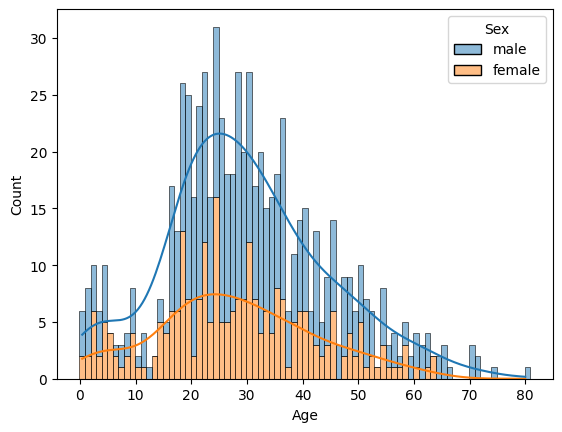

In [67]:
sns.histplot(x="Age", data=dataset, discrete=True, hue="Sex", multiple="stack", kde=True)

minimal_age = dataset["Age"].min()
maximum_age = dataset["Age"].max()

mean_age = dataset["Age"].mean()
mean_age_by_sex = dataset.groupby("Sex")["Age"].mean()

print("Minimal age:", minimal_age)
print("Maximum age:", maximum_age)
print("Mean age:", mean_age)
print("Mean male age:", mean_age_by_sex["male"])
print("Mean female age:", mean_age_by_sex["female"])

**Conclusions**
* Most people were aged 15-37 years
* At every age there are more men than women
* Minimal age was 0.42 years
* Maximum age was 80 years
* Mean age was 29.69911764705882
* Mean male age was 30.72664459161148
* Mean female age was 27.915708812260537

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [68]:
get_title_from_name = lambda name: name.split(',')[1].split('.')[0].strip()
titles = dataset["Name"].apply(get_title_from_name).unique()
print("Number of unique titles:", len(titles))

Number of unique titles: 17


In [69]:
print("Number of passangers by title:")
print(dataset["Name"].map(get_title_from_name).value_counts())

Number of passangers by title:
Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [70]:
get_most_popular_title_by_sex = lambda sex: dataset.query(f'Sex == "{sex}"')["Name"].map(get_title_from_name).value_counts().idxmax()

print("The most popular man's title was", get_most_popular_title_by_sex("male"))
print("The most popular woman's title was", get_most_popular_title_by_sex("female"))


The most popular man's title was Mr
The most popular woman's title was Miss


**Answers**

* Number of unique titles was 17
* Number of passengers by title:\
    Mr              517\
    Miss            182\
    Mrs             125\
    Master           40\
    Dr                7\
    Rev               6\
    Col               2\
    Mlle              2\
    Major             2\
    Ms                1\
    Mme               1\
    Don               1\
    Lady              1\
    Sir               1\
    Capt              1\
    the Countess      1\
    Jonkheer          1
* The most popular man's title was Mr, the most popular woman's title was Miss

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



<Axes: xlabel='Pclass', ylabel='Fare'>

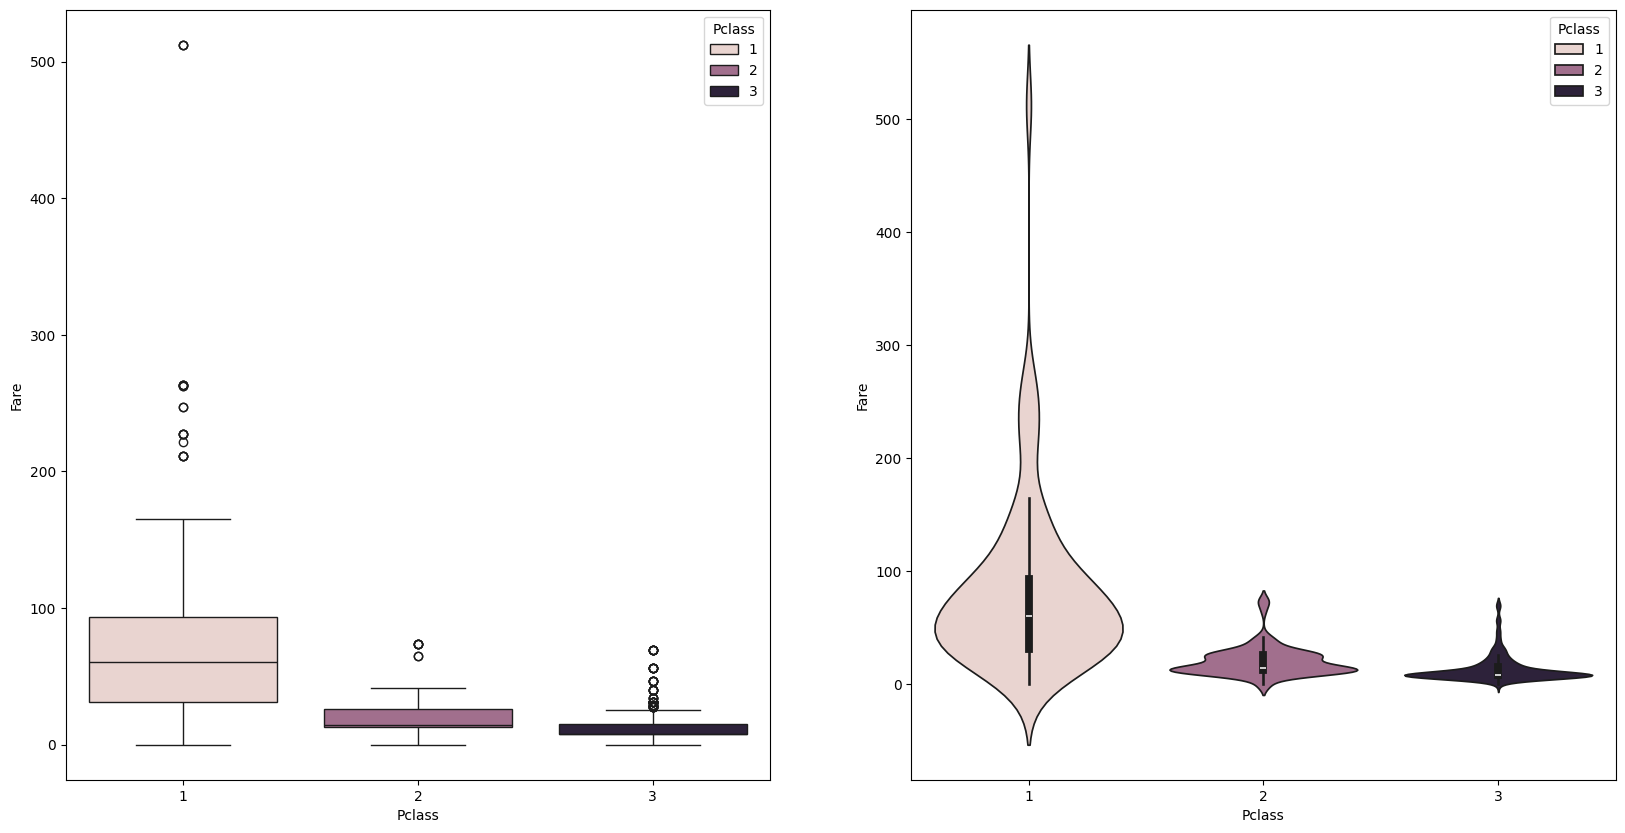

In [71]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x="Pclass", y="Fare", data=dataset, hue="Pclass")
plt.subplot(1, 2, 2)
sns.violinplot(x="Pclass", y="Fare", data=dataset, hue="Pclass")


Mean ticket price by port:
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


<Axes: title={'center': 'Port Southampton'}, xlabel='Fare', ylabel='Count'>

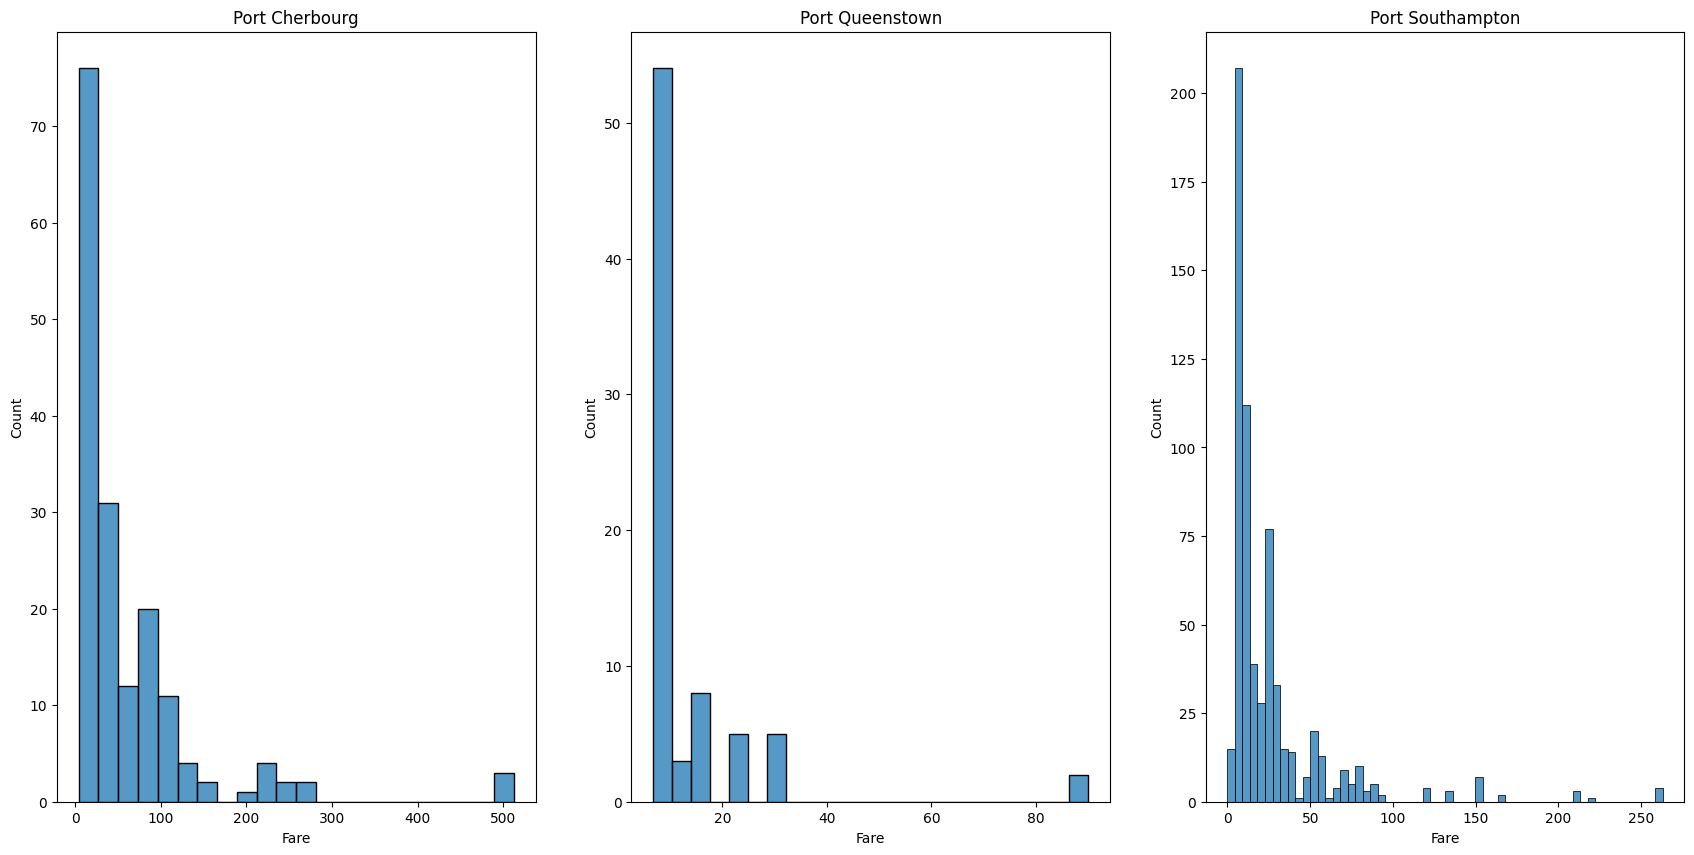

In [72]:
mean_price_by_port = dataset.groupby("Embarked")["Fare"].mean()
print("Mean ticket price by port:")
print(mean_price_by_port)

plt.figure(figsize=(21, 10))
plt.subplot(1, 3, 1)
plt.title("Port Cherbourg")
sns.histplot(x="Fare", data=dataset.query('Embarked == "C"'))
plt.subplot(1, 3, 2)
plt.title("Port Queenstown")
sns.histplot(x="Fare", data=dataset.query('Embarked == "Q"'))
plt.subplot(1, 3, 3)
plt.title("Port Southampton")
sns.histplot(x="Fare", data=dataset.query('Embarked == "S"'))

**Answers**
* "Pclass" and "Fare" are correlated
* Mean price by port:\
    C    59.954144\
    Q    13.276030\
    S    27.079812\
* The distributions at each port are exponential, particularly noticeable at Southampton.


**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

<Axes: xlabel='Embarked', ylabel='Fare'>

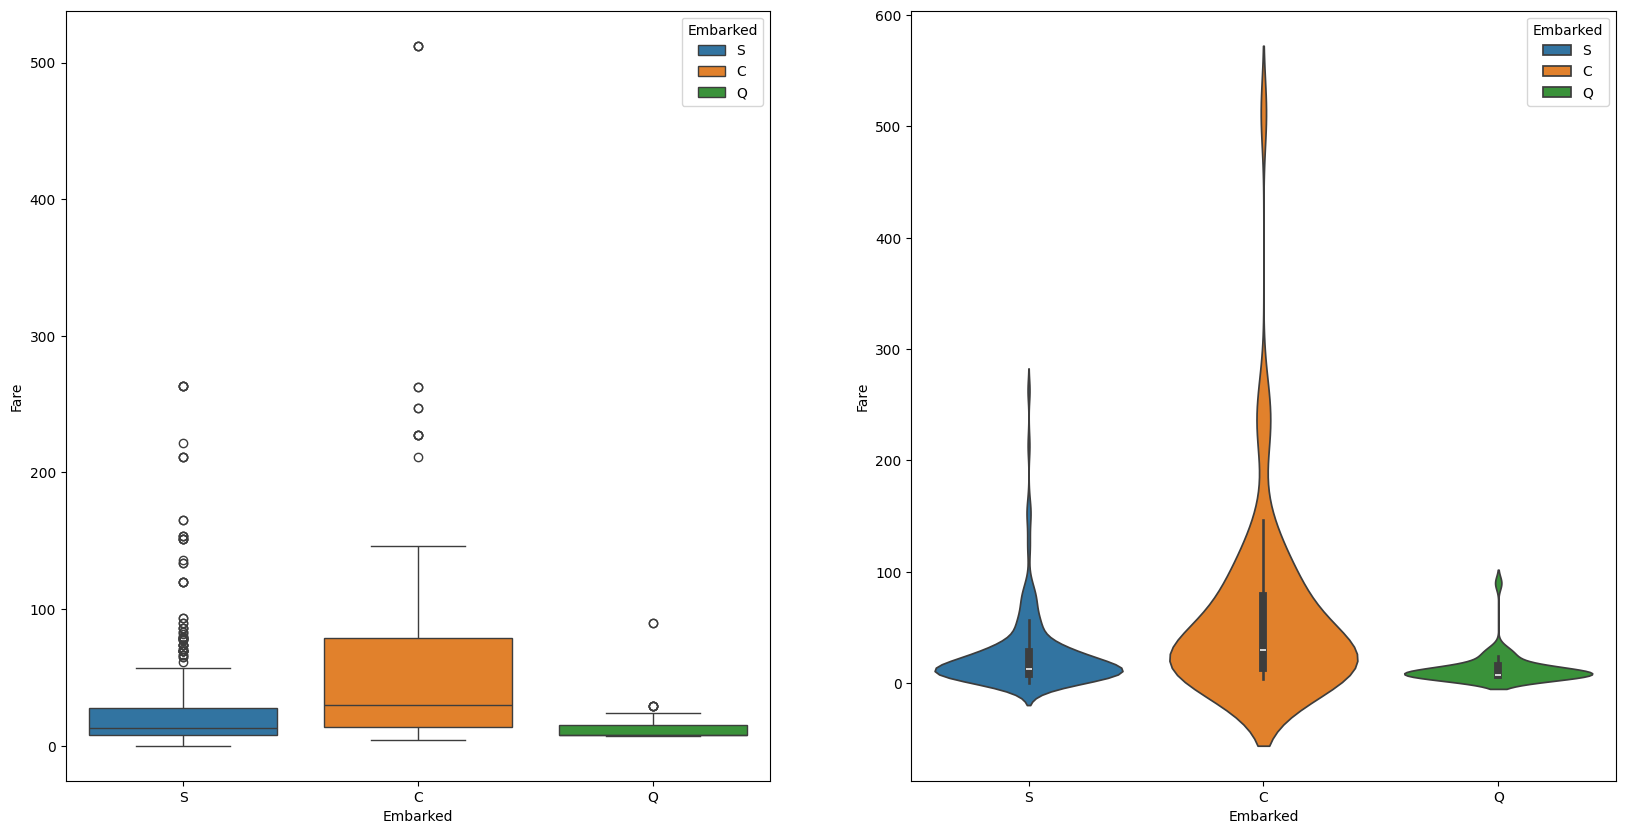

In [73]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x="Embarked", y="Fare", data=dataset, hue="Embarked")
plt.subplot(1, 2, 2)
sns.violinplot(x="Embarked", y="Fare", data=dataset, hue="Embarked")


**Answer**
* Similar to point 4, they correlate

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

<Axes: title={'center': 'Age distibution for died passengers'}, xlabel='Age', ylabel='Count'>

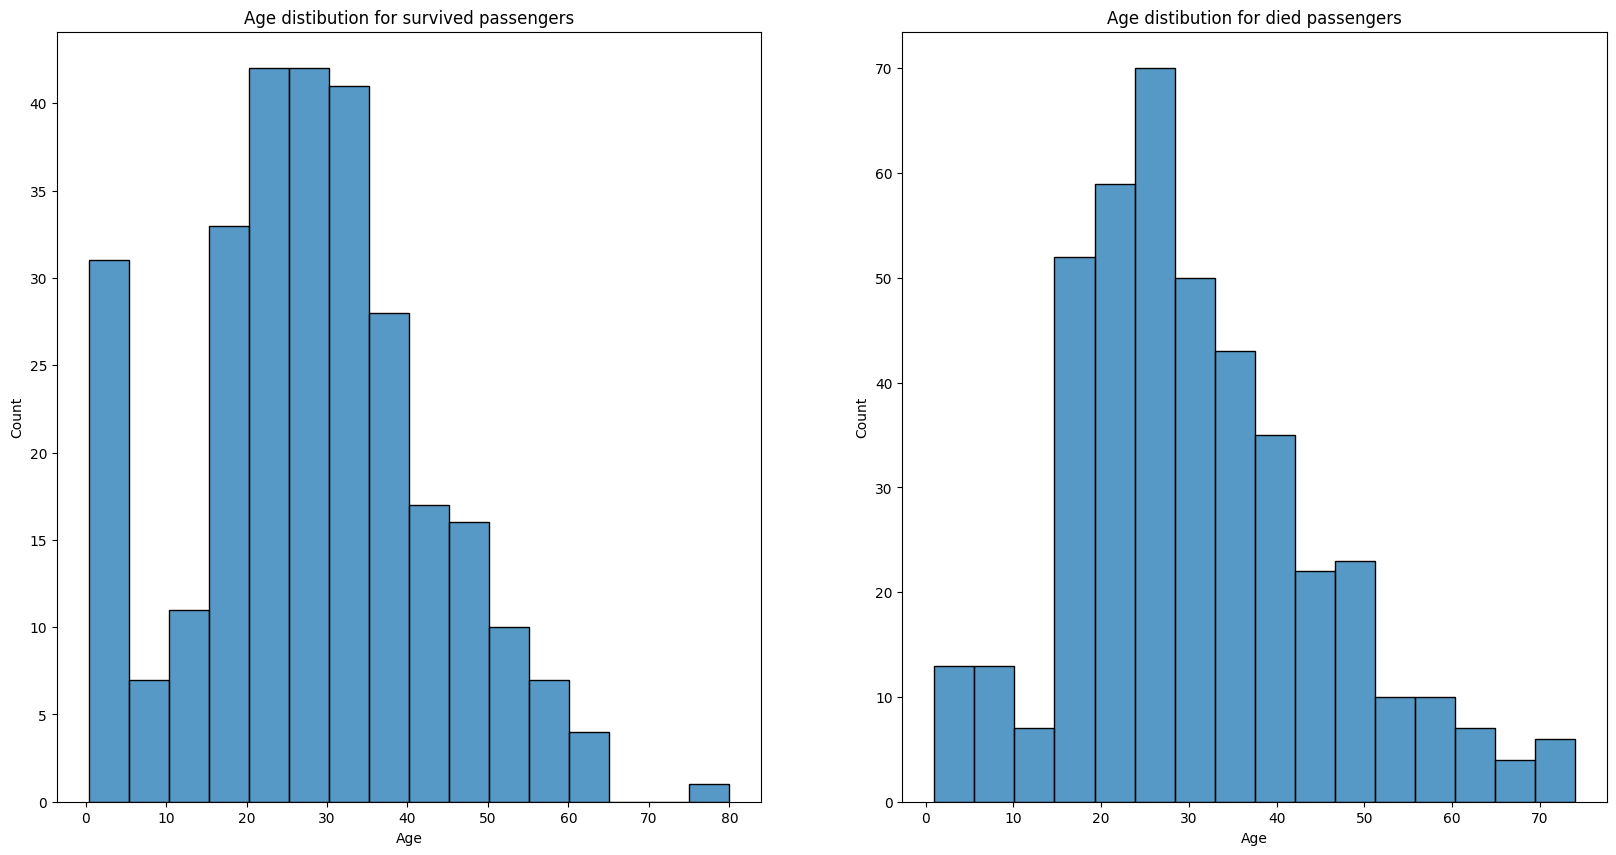

In [74]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Age distibution for survived passengers")
sns.histplot(x="Age", data=dataset.query('Survived == 1'))
plt.subplot(1, 2, 2)
plt.title("Age distibution for died passengers")
sns.histplot(x="Age", data=dataset.query('Survived == 0'))

In [75]:
mean_age_by_survival = dataset.groupby("Survived")["Age"].mean()
print(mean_age_by_survival)

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


<Axes: title={'center': 'Age distibution for male died passengers'}, xlabel='Age', ylabel='Count'>

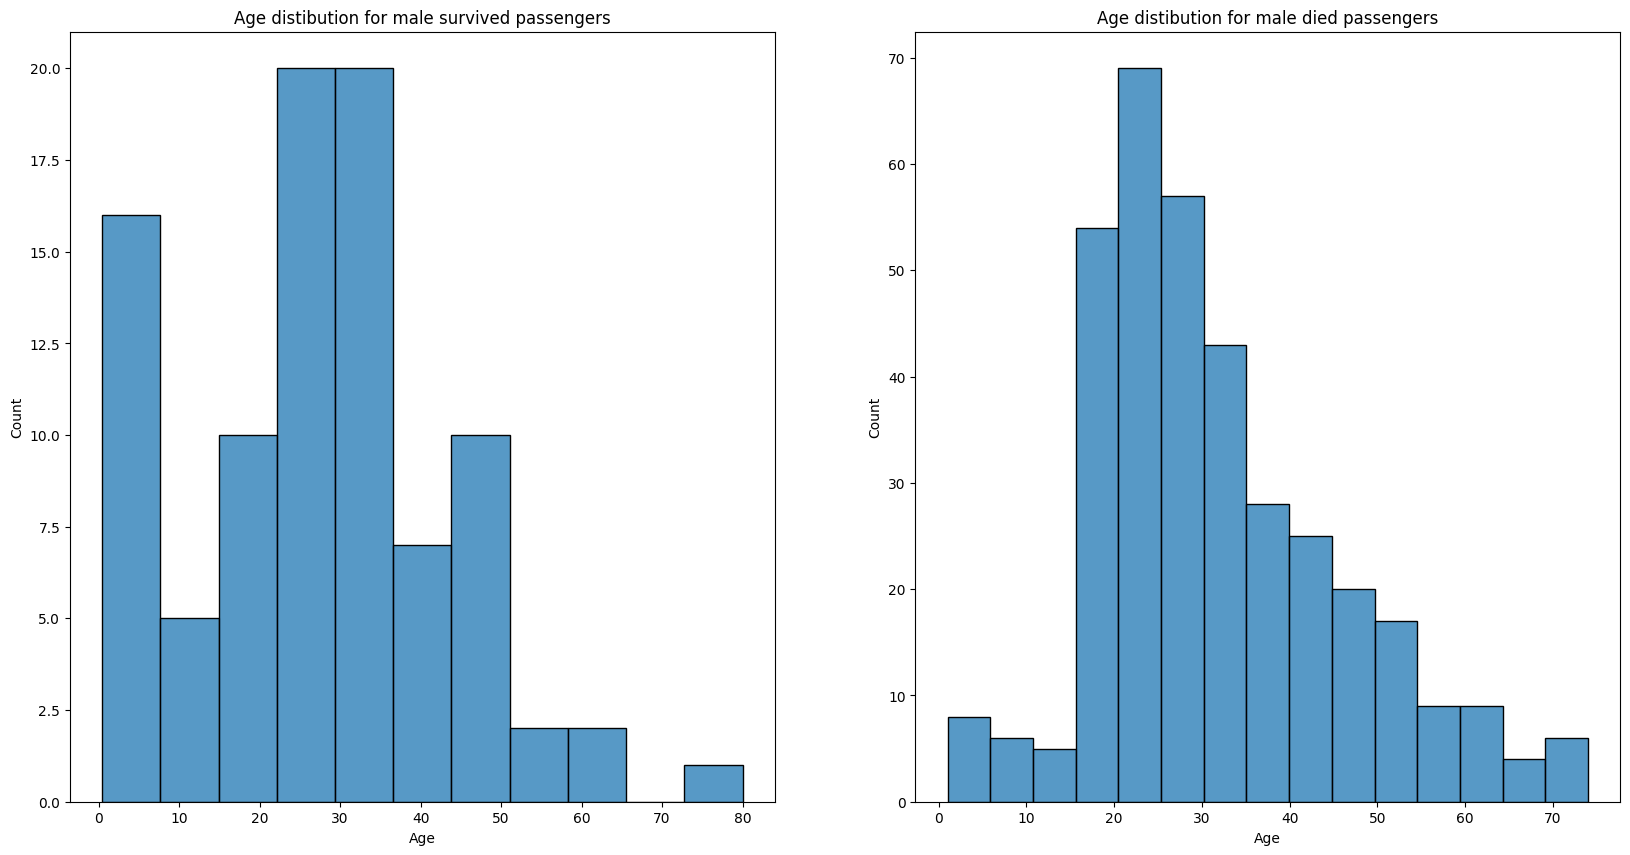

In [76]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Age distibution for male survived passengers")
sns.histplot(x="Age", data=dataset.query('Sex == "male" & Survived == 1'))
plt.subplot(1, 2, 2)
plt.title("Age distibution for male died passengers")
sns.histplot(x="Age", data=dataset.query('Sex == "male" & Survived == 0'))

In [82]:
mean_age_by_surival_male = dataset.query("Sex == 'male'").groupby("Survived")["Age"].mean()
print(mean_age_by_surival_male)

Survived
0    31.618056
1    27.276022
Name: Age, dtype: float64


<Axes: title={'center': 'Age distibution for female died passengers'}, xlabel='Age', ylabel='Count'>

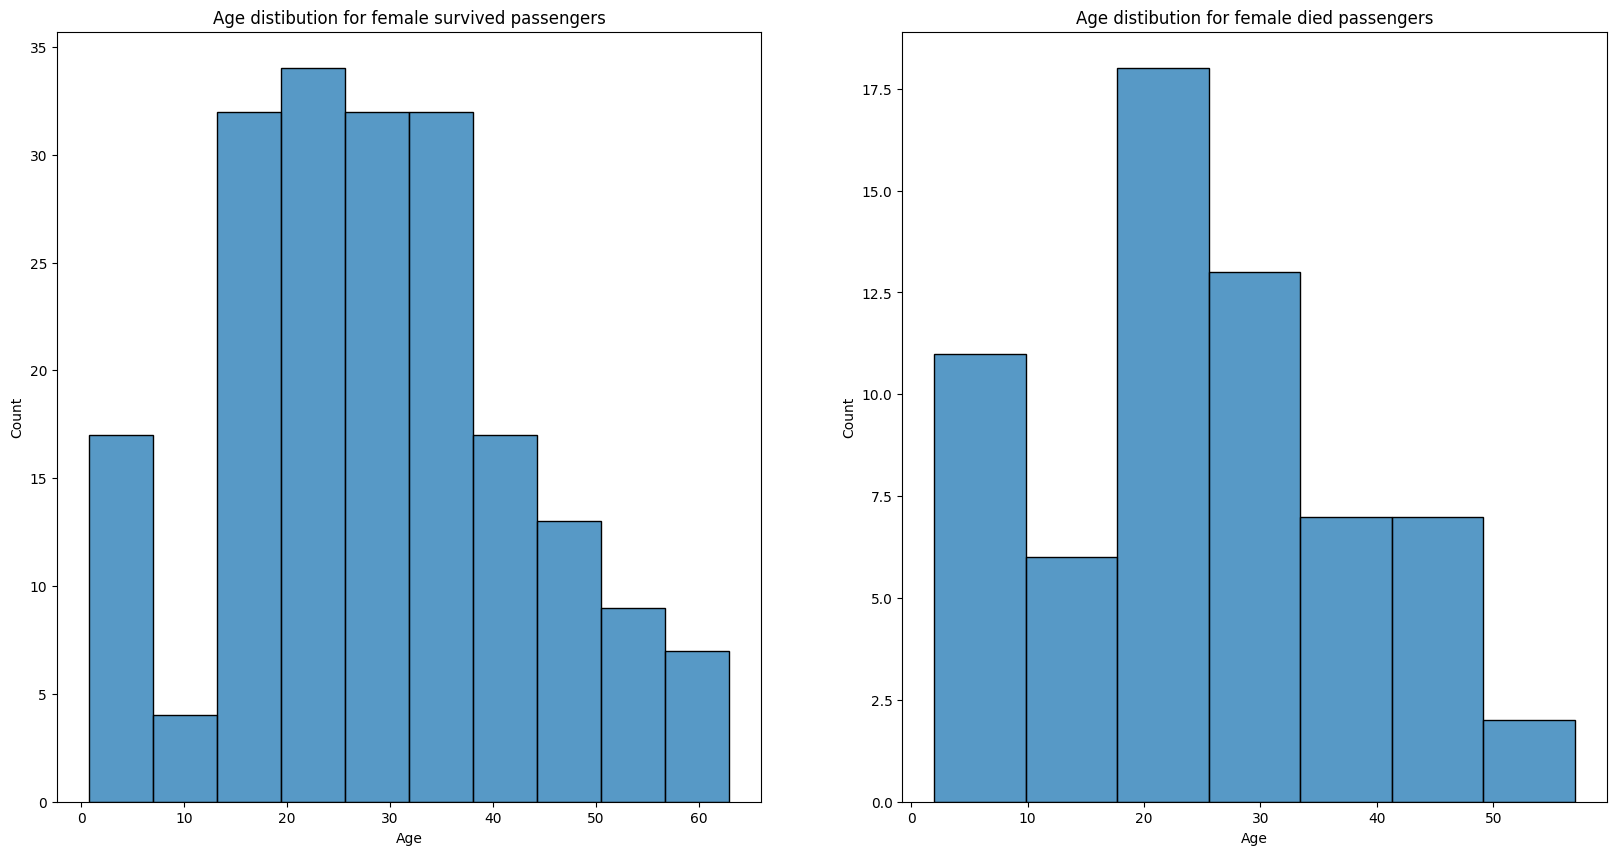

In [77]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Age distibution for female survived passengers")
sns.histplot(x="Age", data=dataset.query('Sex == "female" & Survived == 1'))
plt.subplot(1, 2, 2)
plt.title("Age distibution for female died passengers")
sns.histplot(x="Age", data=dataset.query('Sex == "female" & Survived == 0'))

In [81]:
mean_age_by_surival_female = dataset.query("Sex == 'female'").groupby("Survived")["Age"].mean()
print(mean_age_by_surival_female)

Survived
0    25.046875
1    28.847716
Name: Age, dtype: float64


**Answers**
* Age distributions by surviving are similar, but among passengers aged 0 to 5 years, about 3 times more survived than died and all passangers from 65 to 75 are survived
* Age distibutions by sex not such similar, because (we learned this above) there was more male passengers, therefore their distribution is smoother